In [1]:
import os 
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform
import folium
import json

In [2]:
if platform.system() == 'Windows':
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                           ).get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

#그래프에서 마이너스 기호가 표시되게 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
# 엑셀 파일 경로 설정
excel_file_elec = 'sprint2_base/행정구역별 전력소비량(07~21).xlsx'

# 엑셀 파일에서 시트를 불러오기
locconelec_df = pd.read_excel(excel_file_elec)

# 불러온 데이터 출력
print(locconelec_df)

      연도            서울            부산            대구            인천           광주   
0   2007  4.297282e+07  1.790574e+07  1.292589e+07  1.944655e+07  6803616.263  \
1   2008  4.409635e+07  1.870938e+07  1.326525e+07  1.991537e+07  7044867.682   
2   2009  4.498446e+07  1.868944e+07  1.313373e+07  2.003212e+07  7169714.965   
3   2010  4.729509e+07  2.026368e+07  1.448000e+07  2.182758e+07  7860056.931   
4   2011  4.690299e+07  2.056198e+07  1.482195e+07  2.224114e+07  8047388.135   
5   2012  4.723410e+07  2.066484e+07  1.495496e+07  2.265195e+07  8130493.269   
6   2013  4.655511e+07  2.036471e+07  1.508005e+07  2.267344e+07  8274074.487   
7   2014  4.501886e+07  1.998090e+07  1.485879e+07  2.257805e+07  8197277.025   
8   2015  4.538148e+07  2.000231e+07  1.494771e+07  2.321177e+07  8333872.511   
9   2016  4.649323e+07  2.046709e+07  1.526811e+07  2.387586e+07  8558369.000   
10  2017  4.629816e+07  2.100736e+07  1.538637e+07  2.451531e+07  8683649.000   
11  2018  4.781021e+07  2.12

In [4]:
locconelec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      15 non-null     int64  
 1   서울      15 non-null     float64
 2   부산      15 non-null     float64
 3   대구      15 non-null     float64
 4   인천      15 non-null     float64
 5   광주      15 non-null     float64
 6   대전      15 non-null     float64
 7   울산      15 non-null     float64
 8    세종     15 non-null     float64
 9   경기      15 non-null     float64
 10  강원      15 non-null     float64
 11  충북      15 non-null     float64
 12   충남     15 non-null     float64
 13  전북      15 non-null     float64
 14  전남      15 non-null     float64
 15  경북      15 non-null     float64
 16   경남     15 non-null     float64
 17   제주     15 non-null     float64
 18  계       15 non-null     float64
dtypes: float64(18), int64(1)
memory usage: 2.4 KB


In [5]:
locconelec_df.drop(columns = ['계'], inplace = True)

In [6]:
locconelec_df = pd.DataFrame(locconelec_df)
locconelec_df

,연도,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,2007,4.297282e+07,1.790574e+07,1.292589e+07,1.944655e+07,6803616.263,7823147.339,2.273954e+07,0.000,7.810728e+07,1.356782e+07,1.667810e+07,2.805114e+07,1.516607e+07,2.034140e+07,3.624973e+07,2.678826e+07,3038325.028
1,2008,4.409635e+07,1.870938e+07,1.326525e+07,1.991537e+07,7044867.682,8087633.033,2.413218e+07,0.000,8.184857e+07,1.389575e+07,1.737504e+07,3.042797e+07,1.592780e+07,2.186819e+07,3.716480e+07,2.807497e+07,3183209.759
2,2009,4.498446e+07,1.868944e+07,1.313373e+07,2.003212e+07,7169714.965,8224740.590,2.468255e+07,0.000,8.374350e+07,1.399212e+07,1.759165e+07,3.211547e+07,1.668430e+07,2.358947e+07,3.798331e+07,2.839304e+07,3352343.406
3,2010,4.729509e+07,2.026368e+07,1.448000e+07,2.182758e+07,7860056.931,8867404.745,2.651570e+07,0.000,9.307487e+07,1.484803e+07,1.944484e+07,3.880931e+07,1.894907e+07,2.505993e+07,4.158905e+07,3.154922e+07,3574624.451
4,2011,4.690299e+07,2.056198e+07,1.482195e+07,2.224114e+07,8047388.135,9059776.301,2.819824e+07,0.000,9.684450e+07,1.587604e+07,2.045336e+07,4.265011e+07,2.116836e+07,2.713687e+07,4.416730e+07,3.307121e+07,3710079.721
5,2012,4.723410e+07,2.066484e+07,1.495496e+07,2.265195e+07,8130493.269,9160107.085,2.936272e+07,578610.118,1.002920e+08,1.590438e+07,2.136191e+07,4.449241e+07,2.146233e+07,2.848472e+07,4.479952e+07,3.301495e+07,3864639.132
6,2013,4.655511e+07,2.036471e+07,1.508005e+07,2.267344e+07,8274074.487,9225139.981,2.999297e+07,2345526.777,1.022271e+08,1.579474e+07,2.166504e+07,4.546681e+07,2.170865e+07,3.030207e+07,4.544425e+07,3.353062e+07,4094899.709
7,2014,4.501886e+07,1.998090e+07,1.485879e+07,2.257805e+07,8197277.025,9102523.627,3.011512e+07,2437031.076,1.021807e+08,1.577814e+07,2.217926e+07,4.729496e+07,2.229741e+07,3.172294e+07,4.601636e+07,3.343516e+07,4220090.219
8,2015,4.538148e+07,2.000231e+07,1.494771e+07,2.321177e+07,8333872.511,9182737.221,3.028614e+07,2641139.384,1.050480e+08,1.620662e+07,2.294903e+07,4.728606e+07,2.208686e+07,3.263783e+07,4.495684e+07,3.387633e+07,4429553.218
9,2016,4.649323e+07,2.046709e+07,1.526811e+07,2.387586e+07,8558369.000,9379633.000,3.209522e+07,2801869.000,1.094039e+08,1.649877e+07,2.400886e+07,4.845393e+07,2.273350e+07,3.309690e+07,4.464750e+07,3.449748e+07,4738201.000


In [7]:
# 연도를 기준으로 index 변경
locconelec_df.set_index("연도", inplace=True)
print(locconelec_df)

                서울            부산            대구            인천           광주   
연도                                                                          
2007  4.297282e+07  1.790574e+07  1.292589e+07  1.944655e+07  6803616.263  \
2008  4.409635e+07  1.870938e+07  1.326525e+07  1.991537e+07  7044867.682   
2009  4.498446e+07  1.868944e+07  1.313373e+07  2.003212e+07  7169714.965   
2010  4.729509e+07  2.026368e+07  1.448000e+07  2.182758e+07  7860056.931   
2011  4.690299e+07  2.056198e+07  1.482195e+07  2.224114e+07  8047388.135   
2012  4.723410e+07  2.066484e+07  1.495496e+07  2.265195e+07  8130493.269   
2013  4.655511e+07  2.036471e+07  1.508005e+07  2.267344e+07  8274074.487   
2014  4.501886e+07  1.998090e+07  1.485879e+07  2.257805e+07  8197277.025   
2015  4.538148e+07  2.000231e+07  1.494771e+07  2.321177e+07  8333872.511   
2016  4.649323e+07  2.046709e+07  1.526811e+07  2.387586e+07  8558369.000   
2017  4.629816e+07  2.100736e+07  1.538637e+07  2.451531e+07  8683649.000   

In [8]:
locconelec_df.columns=['서울시','부산시','대구시','인천시','광주시', '대전시', '울산시', '세종시', 
                       '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주도']

In [9]:
locconelec_df

,서울시,부산시,대구시,인천시,광주시,대전시,울산시,세종시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주도
연도,,,,,,,,,,,,,,,,,
2007,4.297282e+07,1.790574e+07,1.292589e+07,1.944655e+07,6803616.263,7823147.339,2.273954e+07,0.000,7.810728e+07,1.356782e+07,1.667810e+07,2.805114e+07,1.516607e+07,2.034140e+07,3.624973e+07,2.678826e+07,3038325.028
2008,4.409635e+07,1.870938e+07,1.326525e+07,1.991537e+07,7044867.682,8087633.033,2.413218e+07,0.000,8.184857e+07,1.389575e+07,1.737504e+07,3.042797e+07,1.592780e+07,2.186819e+07,3.716480e+07,2.807497e+07,3183209.759
2009,4.498446e+07,1.868944e+07,1.313373e+07,2.003212e+07,7169714.965,8224740.590,2.468255e+07,0.000,8.374350e+07,1.399212e+07,1.759165e+07,3.211547e+07,1.668430e+07,2.358947e+07,3.798331e+07,2.839304e+07,3352343.406
2010,4.729509e+07,2.026368e+07,1.448000e+07,2.182758e+07,7860056.931,8867404.745,2.651570e+07,0.000,9.307487e+07,1.484803e+07,1.944484e+07,3.880931e+07,1.894907e+07,2.505993e+07,4.158905e+07,3.154922e+07,3574624.451
2011,4.690299e+07,2.056198e+07,1.482195e+07,2.224114e+07,8047388.135,9059776.301,2.819824e+07,0.000,9.684450e+07,1.587604e+07,2.045336e+07,4.265011e+07,2.116836e+07,2.713687e+07,4.416730e+07,3.307121e+07,3710079.721
2012,4.723410e+07,2.066484e+07,1.495496e+07,2.265195e+07,8130493.269,9160107.085,2.936272e+07,578610.118,1.002920e+08,1.590438e+07,2.136191e+07,4.449241e+07,2.146233e+07,2.848472e+07,4.479952e+07,3.301495e+07,3864639.132
2013,4.655511e+07,2.036471e+07,1.508005e+07,2.267344e+07,8274074.487,9225139.981,2.999297e+07,2345526.777,1.022271e+08,1.579474e+07,2.166504e+07,4.546681e+07,2.170865e+07,3.030207e+07,4.544425e+07,3.353062e+07,4094899.709
2014,4.501886e+07,1.998090e+07,1.485879e+07,2.257805e+07,8197277.025,9102523.627,3.011512e+07,2437031.076,1.021807e+08,1.577814e+07,2.217926e+07,4.729496e+07,2.229741e+07,3.172294e+07,4.601636e+07,3.343516e+07,4220090.219
2015,4.538148e+07,2.000231e+07,1.494771e+07,2.321177e+07,8333872.511,9182737.221,3.028614e+07,2641139.384,1.050480e+08,1.620662e+07,2.294903e+07,4.728606e+07,2.208686e+07,3.263783e+07,4.495684e+07,3.387633e+07,4429553.218


In [10]:
locconelec_df = locconelec_df.astype(int)

In [11]:
locconelec_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 2007 to 2021
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   서울시     15 non-null     int32
 1   부산시     15 non-null     int32
 2   대구시     15 non-null     int32
 3   인천시     15 non-null     int32
 4   광주시     15 non-null     int32
 5   대전시     15 non-null     int32
 6   울산시     15 non-null     int32
 7   세종시     15 non-null     int32
 8   경기도     15 non-null     int32
 9   강원도     15 non-null     int32
 10  충청북도    15 non-null     int32
 11  충청남도    15 non-null     int32
 12  전라북도    15 non-null     int32
 13  전라남도    15 non-null     int32
 14  경상북도    15 non-null     int32
 15  경상남도    15 non-null     int32
 16  제주도     15 non-null     int32
dtypes: int32(17)
memory usage: 1.1 KB


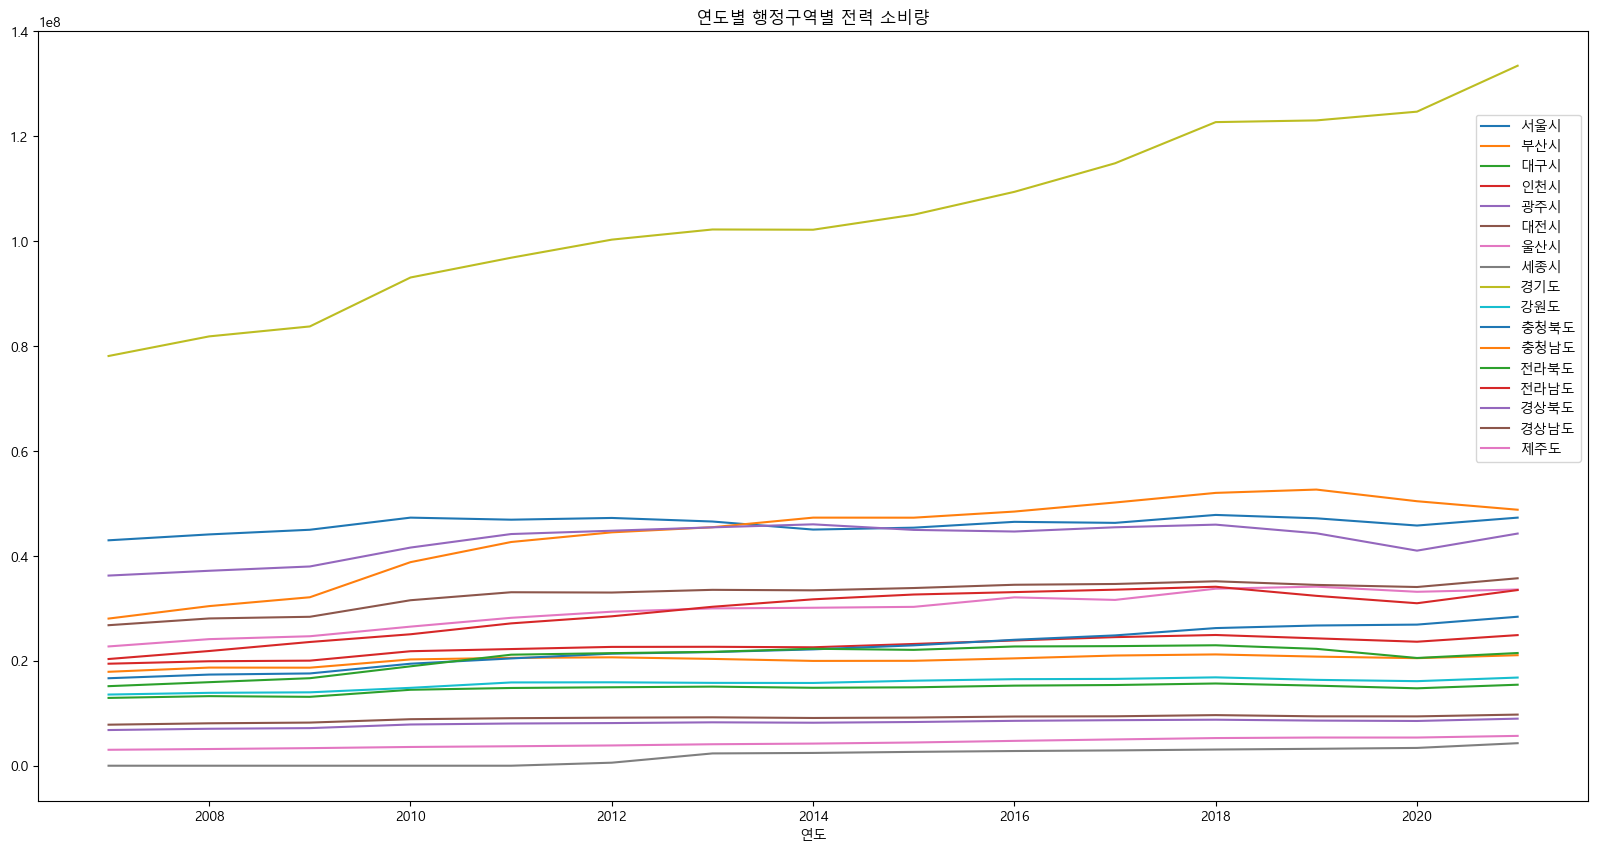

In [12]:
# 꺾은 선 그래프 그리기
locconelec_df.plot(figsize=(20, 10))
plt.legend(loc='upper right', bbox_to_anchor = (1, 0.9))
plt.title('연도별 행정구역별 전력 소비량')
plt.show()

In [13]:
# 연도별 전력 소비량 추출
locconelec_year = []
for i in range(15) :
    locconelec_year.append(locconelec_df.iloc[i:i+1])


In [14]:
locconelec_year[13]

,서울시,부산시,대구시,인천시,광주시,대전시,울산시,세종시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주도
연도,,,,,,,,,,,,,,,,,
2020,45787926,20503969,14758568,23638582,8531108,9405220,33157834,3393222,124688963,16120066,26901894,50422732,20538911,30973974,41001626,34069974,5373287


In [15]:
# 대한민국 지도 데이터 불러오기
jsonfile = open('sprint2_base/TL_SCCO_CTPRVN.json', 'r', 
                encoding='utf8').read()
jsondata = json.loads(jsonfile)


In [16]:
### 지도맵 그리기
electronic_map_2020 = folium.Map(
    ### 최초에 보여줄 지도위치(위/경도) 지정
    # - 최초에 중심점을 기준으로 지도가 그려짐
    location = [37.573050, 126.979189],

    ### 지도 스타일 지정하기
    # - 도시형 건물, 산림, 하천/도로 등 스타일 지정
    # openstreetmap : 도시형 건물 스타일(가장 일반적으로 사용됨)
    tiles = "openstreetmap",

    ### 최초에 화면에 보여질 스케일(zoom) 지정하기
    zoom_start = 6.5
)

electronic_map_2020

In [17]:
# 지역별 구분 시각화
folium.GeoJson(jsondata, name='시도').add_to(electronic_map_2020)
electronic_map_2020

In [18]:
locconelec_year[13].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 2020 to 2020
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   서울시     1 non-null      int32
 1   부산시     1 non-null      int32
 2   대구시     1 non-null      int32
 3   인천시     1 non-null      int32
 4   광주시     1 non-null      int32
 5   대전시     1 non-null      int32
 6   울산시     1 non-null      int32
 7   세종시     1 non-null      int32
 8   경기도     1 non-null      int32
 9   강원도     1 non-null      int32
 10  충청북도    1 non-null      int32
 11  충청남도    1 non-null      int32
 12  전라북도    1 non-null      int32
 13  전라남도    1 non-null      int32
 14  경상북도    1 non-null      int32
 15  경상남도    1 non-null      int32
 16  제주도     1 non-null      int32
dtypes: int32(17)
memory usage: 76.0 bytes


In [19]:
locconelec_year[13]

,서울시,부산시,대구시,인천시,광주시,대전시,울산시,세종시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주도
연도,,,,,,,,,,,,,,,,,
2020,45787926,20503969,14758568,23638582,8531108,9405220,33157834,3393222,124688963,16120066,26901894,50422732,20538911,30973974,41001626,34069974,5373287


In [20]:
# 데이터 형태 회전
locconelec_2020_df = locconelec_year[13].T

In [21]:
locconelec_2020_df

연도,2020
서울시,45787926
부산시,20503969
대구시,14758568
인천시,23638582
광주시,8531108
대전시,9405220
울산시,33157834
세종시,3393222
경기도,124688963
강원도,16120066


In [22]:
# 데이터 컬럼 형태 확인
locconelec_2020_df.columns

Index([2020], dtype='int64', name='연도')

In [23]:
# 데이터 이름 재설정 및 수정
locconelec_2020_df.rename(columns={2020:'전력소비량'}, inplace=True)

In [24]:
locconelec_2020_df

연도,전력소비량
서울시,45787926
부산시,20503969
대구시,14758568
인천시,23638582
광주시,8531108
대전시,9405220
울산시,33157834
세종시,3393222
경기도,124688963
강원도,16120066


In [25]:
locconelec_2020_df.index

Index(['서울시', '부산시', '대구시', '인천시', '광주시', '대전시', '울산시', '세종시', '경기도', '강원도',
       '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주도'],
      dtype='object')

In [26]:
# 인덱스 초기화하여 인덱스로 되어있는 지역명을 칼럼으로 변환
locconelec_2020_df = locconelec_2020_df.reset_index()

In [27]:
locconelec_2020_df

연도,index,전력소비량
0,서울시,45787926
1,부산시,20503969
2,대구시,14758568
3,인천시,23638582
4,광주시,8531108
5,대전시,9405220
6,울산시,33157834
7,세종시,3393222
8,경기도,124688963
9,강원도,16120066


In [28]:
# 'index' 명을 '지역명'으로 컬럼명 재설정
locconelec_2020_df = locconelec_2020_df.rename(columns={'index': '지역명'})

In [29]:
locconelec_2020_df

연도,지역명,전력소비량
0,서울시,45787926
1,부산시,20503969
2,대구시,14758568
3,인천시,23638582
4,광주시,8531108
5,대전시,9405220
6,울산시,33157834
7,세종시,3393222
8,경기도,124688963
9,강원도,16120066


In [30]:
# columns = ['서울시', '부산시', '대구시', '인천시', '광주시', '대전시', '울산시', '세종시', 
#            '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주도'], # DataFrame의 어떤 columns을 넣을지

In [31]:
folium.Choropleth(
    geo_data = jsondata, # 경계선 좌표값이 담긴 데이터
    data = locconelec_2020_df, # Series or DataFrame 넣으면 된다
    columns = ['지역명','전력소비량'], # DataFrame의 어떤 columns을 넣을지
    key_on = 'feature.properties.CTP_KOR_NM', # id 값을 가져오겠다; feature.id : feature 붙여줘야 함 (folium의 정해진 형식)
    fill_color = 'YlOrRd',
    fill_opacity = 0.6, # 색 투명도
    line_opacity = 0.6, # 선 투명도
    legend_name = '2020년 행정구역별 전력소비량', # 범례
    highlight=True,
).add_to(electronic_map_2020)
electronic_map_2020

In [32]:
locconelec_2020_df

연도,지역명,전력소비량
0,서울시,45787926
1,부산시,20503969
2,대구시,14758568
3,인천시,23638582
4,광주시,8531108
5,대전시,9405220
6,울산시,33157834
7,세종시,3393222
8,경기도,124688963
9,강원도,16120066


In [33]:
# # 전력소비량 기준으로 내림차순으로 정리
# locconelec_2020_df = locconelec_2020_df.sort_values(by='전력소비량')



In [34]:
# locconelec_2020_df

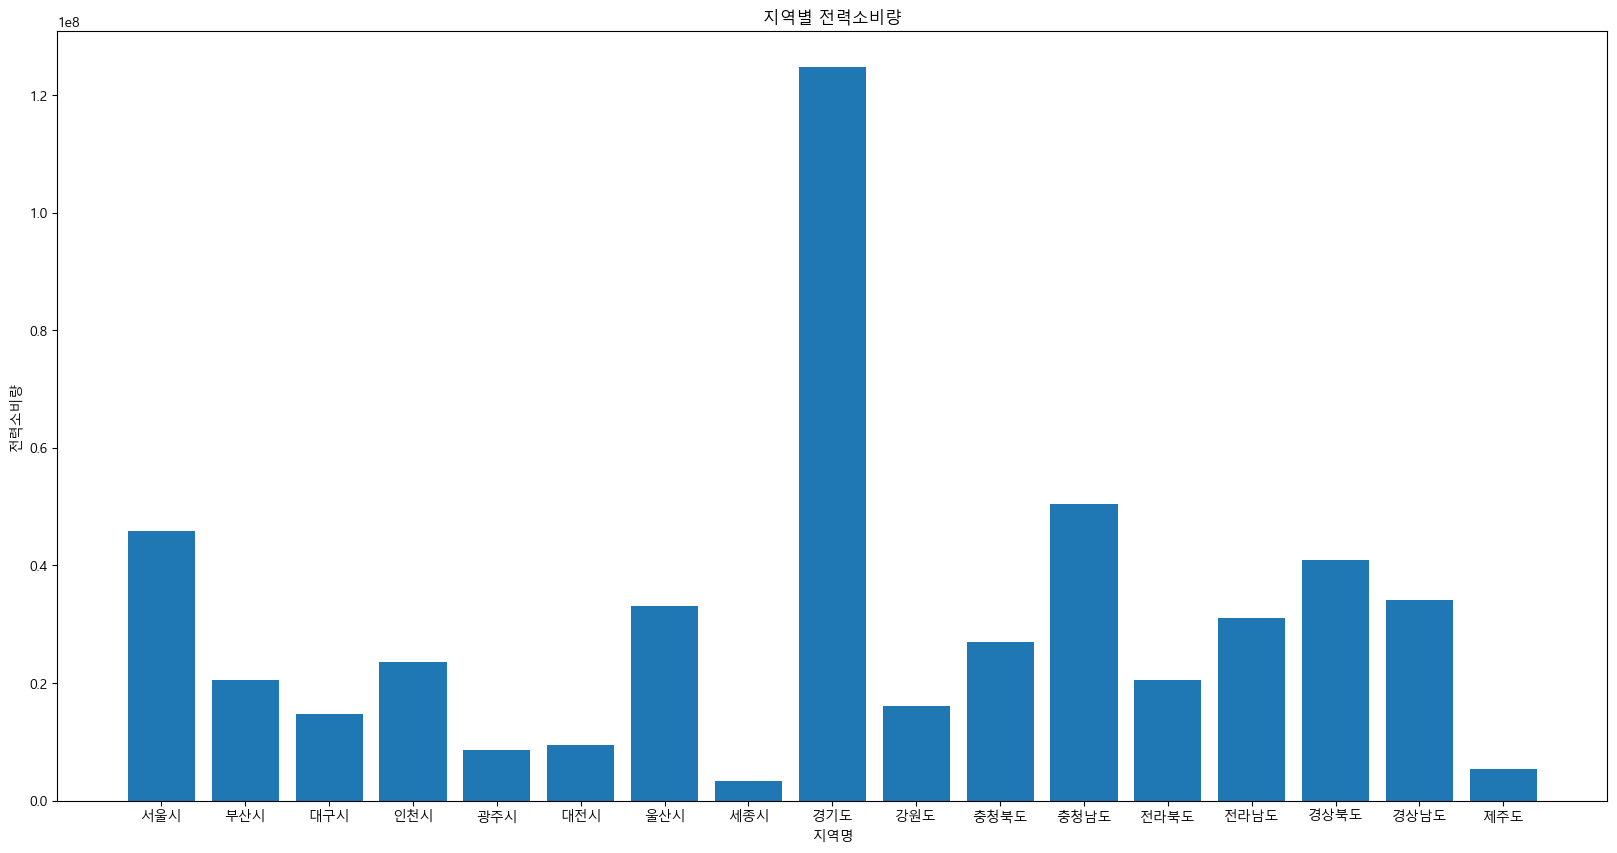

In [35]:
# 지역별 전력소비량 내림차순으로 바그래프로 시각화

# 그래프 크기 조정
plt.figure(figsize=(20, 10))

# 데이터 준비
x = locconelec_2020_df['지역명']
y = locconelec_2020_df['전력소비량']

# 바 그래프 그리기
plt.bar(x, y)

# 그래프 제목 설정
plt.title('지역별 전력소비량')

# x축, y축 라벨 설정
plt.xlabel('지역명')
plt.ylabel('전력소비량')



# 그래프 출력
plt.show()


In [36]:
# 엑셀 파일 경로 설정
excel_file_people = 'sprint2_base/행정구역별__인구수.xlsx'

# 엑셀 파일에서 시트를 불러오기
locpeople_df = pd.read_excel(excel_file_people)

# 불러온 데이터 출력
print(locpeople_df)

         행정구역별      2007      2008      2009      2010      2011        2012   
0   행정구역(시군구)별       NaN       NaN       NaN       NaN       NaN         NaN  \
1           전국  49268928  49540367  49773145  50515666  50734284  50948272.0   
2          서울시  10192710  10200827  10208302  10312545  10249679  10195318.0   
3          부산시   3587439   3564577   3543030   3567910   3550963   3538484.0   
4          대구시   2493261   2492724   2489781   2511676   2507271   2505644.0   
5          인천시   2664576   2692696   2710579   2758296   2801274   2843981.0   
6          광주시   1413444   1422702   1433640   1454636   1463464   1469216.0   
7          대전시   1475659   1480895   1484180   1503664   1515603   1524583.0   
8          울산시   1099995   1112407   1114866   1126298   1135494   1147256.0   
9          세종시         -         -         -         -         -    113117.0   
10         경기도  11106211  11292264  11460610  11786622  11937415  12093299.0   
11         강원도   1503806   1508575   151

In [37]:
locpeople_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정구역별   19 non-null     object 
 1   2007    18 non-null     object 
 2   2008    18 non-null     object 
 3   2009    18 non-null     object 
 4   2010    18 non-null     object 
 5   2011    18 non-null     object 
 6   2012    18 non-null     float64
 7   2013    18 non-null     float64
 8   2014    18 non-null     float64
 9   2015    18 non-null     float64
 10  2016    18 non-null     float64
 11  2017    18 non-null     float64
 12  2018    18 non-null     float64
 13  2019    18 non-null     float64
 14  2020    18 non-null     float64
 15  2021    18 non-null     float64
 16  2022    18 non-null     float64
dtypes: float64(11), object(6)
memory usage: 2.6+ KB


In [38]:
# 첫 번째 행 삭제
locpeople_df = locpeople_df.drop(0)

In [39]:
# 두 번째 행(전국 총 인구) 삭제
locpeople_df = locpeople_df.drop(1)

In [40]:
locpeople_df

,행정구역별,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,서울시,10192710,10200827,10208302,10312545,10249679,10195318.0,10143645.0,10103233.0,10022181.0,9930616.0,9857426.0,9765623.0,9729107.0,9668465.0,9509458.0,9428372.0
3,부산시,3587439,3564577,3543030,3567910,3550963,3538484.0,3527635.0,3519401.0,3513777.0,3498529.0,3470653.0,3441453.0,3413841.0,3391946.0,3350380.0,3317812.0
4,대구시,2493261,2492724,2489781,2511676,2507271,2505644.0,2501588.0,2493264.0,2487829.0,2484557.0,2475231.0,2461769.0,2438031.0,2418346.0,2385412.0,2363691.0
5,인천시,2664576,2692696,2710579,2758296,2801274,2843981.0,2879782.0,2902608.0,2925815.0,2943069.0,2948542.0,2954642.0,2957026.0,2942828.0,2948375.0,2967314.0
6,광주시,1413444,1422702,1433640,1454636,1463464,1469216.0,1472910.0,1475884.0,1472199.0,1469214.0,1463770.0,1459336.0,1456468.0,1450062.0,1441611.0,1431050.0
7,대전시,1475659,1480895,1484180,1503664,1515603,1524583.0,1532811.0,1531809.0,1518775.0,1514370.0,1502227.0,1489936.0,1474870.0,1463882.0,1452251.0,1446072.0
8,울산시,1099995,1112407,1114866,1126298,1135494,1147256.0,1156480.0,1166377.0,1173534.0,1172304.0,1165132.0,1155623.0,1148019.0,1136017.0,1121592.0,1110663.0
9,세종시,-,-,-,-,-,113117.0,122153.0,156125.0,210884.0,243048.0,280100.0,314126.0,340575.0,355831.0,371895.0,383591.0
10,경기도,11106211,11292264,11460610,11786622,11937415,12093299.0,12234630.0,12357830.0,12522606.0,12716780.0,12873895.0,13077153.0,13239666.0,13427014.0,13565450.0,13589432.0
11,강원도,1503806,1508575,1512870,1529818,1536448,1538630.0,1542263.0,1544442.0,1549507.0,1550806.0,1550142.0,1543052.0,1541502.0,1542840.0,1538492.0,1536498.0


In [41]:
locpeople_df = pd.DataFrame(locpeople_df)
locpeople_df

,행정구역별,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,서울시,10192710,10200827,10208302,10312545,10249679,10195318.0,10143645.0,10103233.0,10022181.0,9930616.0,9857426.0,9765623.0,9729107.0,9668465.0,9509458.0,9428372.0
3,부산시,3587439,3564577,3543030,3567910,3550963,3538484.0,3527635.0,3519401.0,3513777.0,3498529.0,3470653.0,3441453.0,3413841.0,3391946.0,3350380.0,3317812.0
4,대구시,2493261,2492724,2489781,2511676,2507271,2505644.0,2501588.0,2493264.0,2487829.0,2484557.0,2475231.0,2461769.0,2438031.0,2418346.0,2385412.0,2363691.0
5,인천시,2664576,2692696,2710579,2758296,2801274,2843981.0,2879782.0,2902608.0,2925815.0,2943069.0,2948542.0,2954642.0,2957026.0,2942828.0,2948375.0,2967314.0
6,광주시,1413444,1422702,1433640,1454636,1463464,1469216.0,1472910.0,1475884.0,1472199.0,1469214.0,1463770.0,1459336.0,1456468.0,1450062.0,1441611.0,1431050.0
7,대전시,1475659,1480895,1484180,1503664,1515603,1524583.0,1532811.0,1531809.0,1518775.0,1514370.0,1502227.0,1489936.0,1474870.0,1463882.0,1452251.0,1446072.0
8,울산시,1099995,1112407,1114866,1126298,1135494,1147256.0,1156480.0,1166377.0,1173534.0,1172304.0,1165132.0,1155623.0,1148019.0,1136017.0,1121592.0,1110663.0
9,세종시,-,-,-,-,-,113117.0,122153.0,156125.0,210884.0,243048.0,280100.0,314126.0,340575.0,355831.0,371895.0,383591.0
10,경기도,11106211,11292264,11460610,11786622,11937415,12093299.0,12234630.0,12357830.0,12522606.0,12716780.0,12873895.0,13077153.0,13239666.0,13427014.0,13565450.0,13589432.0
11,강원도,1503806,1508575,1512870,1529818,1536448,1538630.0,1542263.0,1544442.0,1549507.0,1550806.0,1550142.0,1543052.0,1541502.0,1542840.0,1538492.0,1536498.0


In [42]:
locpeople_df = locpeople_df.T

In [43]:
locpeople_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 행정구역별 to 2022
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2       17 non-null     object
 1   3       17 non-null     object
 2   4       17 non-null     object
 3   5       17 non-null     object
 4   6       17 non-null     object
 5   7       17 non-null     object
 6   8       17 non-null     object
 7   9       17 non-null     object
 8   10      17 non-null     object
 9   11      17 non-null     object
 10  12      17 non-null     object
 11  13      17 non-null     object
 12  14      17 non-null     object
 13  15      17 non-null     object
 14  16      17 non-null     object
 15  17      17 non-null     object
 16  18      17 non-null     object
dtypes: object(17)
memory usage: 2.9+ KB


In [44]:
locpeople_df = locpeople_df.rename(columns={'행정구역별': '연도'})

In [45]:
locpeople_df

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
행정구역별,서울시,부산시,대구시,인천시,광주시,대전시,울산시,세종시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주도
2007,10192710,3587439,2493261,2664576,1413444,1475659,1099995,-,11106211,1503806,1506608,1995531,1862277,1929836,2681364,3196953,559258
2008,10200827,3564577,2492724,2692696,1422702,1480895,1112407,-,11292264,1508575,1519587,2018537,1855772,1919000,2673931,3225255,560618
2009,10208302,3543030,2489781,2710579,1433640,1484180,1114866,-,11460610,1512870,1527478,2037582,1854508,1913004,2669876,3250176,562663
2010,10312545,3567910,2511676,2758296,1454636,1503664,1126298,-,11786622,1529818,1549528,2075514,1868963,1918485,2689920,3290536,571255
2011,10249679,3550963,2507271,2801274,1463464,1515603,1135494,-,11937415,1536448,1562903,2101284,1874031,1914339,2699195,3308765,576156
2012,10195318.0,3538484.0,2505644.0,2843981.0,1469216.0,1524583.0,1147256.0,113117.0,12093299.0,1538630.0,1565628.0,2028777.0,1873341.0,1909618.0,2698353.0,3319314.0,583713.0
2013,10143645.0,3527635.0,2501588.0,2879782.0,1472910.0,1532811.0,1156480.0,122153.0,12234630.0,1542263.0,1572732.0,2047631.0,1872965.0,1907172.0,2699440.0,3333820.0,593806.0
2014,10103233.0,3519401.0,2493264.0,2902608.0,1475884.0,1531809.0,1166377.0,156125.0,12357830.0,1544442.0,1578933.0,2062273.0,1871560.0,1905780.0,2700794.0,3350257.0,607346.0
2015,10022181.0,3513777.0,2487829.0,2925815.0,1472199.0,1518775.0,1173534.0,210884.0,12522606.0,1549507.0,1583952.0,2077649.0,1869711.0,1908996.0,2702826.0,3364702.0,624395.0


In [46]:
locpeople_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 행정구역별 to 2022
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2       17 non-null     object
 1   3       17 non-null     object
 2   4       17 non-null     object
 3   5       17 non-null     object
 4   6       17 non-null     object
 5   7       17 non-null     object
 6   8       17 non-null     object
 7   9       17 non-null     object
 8   10      17 non-null     object
 9   11      17 non-null     object
 10  12      17 non-null     object
 11  13      17 non-null     object
 12  14      17 non-null     object
 13  15      17 non-null     object
 14  16      17 non-null     object
 15  17      17 non-null     object
 16  18      17 non-null     object
dtypes: object(17)
memory usage: 2.9+ KB


In [47]:
locpeople_df.columns=['서울시','부산시','대구시','인천시','광주시', '대전시', '울산시', '세종시', 
                       '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주도']

In [48]:
locpeople_df

,서울시,부산시,대구시,인천시,광주시,대전시,울산시,세종시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주도
행정구역별,서울시,부산시,대구시,인천시,광주시,대전시,울산시,세종시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주도
2007,10192710,3587439,2493261,2664576,1413444,1475659,1099995,-,11106211,1503806,1506608,1995531,1862277,1929836,2681364,3196953,559258
2008,10200827,3564577,2492724,2692696,1422702,1480895,1112407,-,11292264,1508575,1519587,2018537,1855772,1919000,2673931,3225255,560618
2009,10208302,3543030,2489781,2710579,1433640,1484180,1114866,-,11460610,1512870,1527478,2037582,1854508,1913004,2669876,3250176,562663
2010,10312545,3567910,2511676,2758296,1454636,1503664,1126298,-,11786622,1529818,1549528,2075514,1868963,1918485,2689920,3290536,571255
2011,10249679,3550963,2507271,2801274,1463464,1515603,1135494,-,11937415,1536448,1562903,2101284,1874031,1914339,2699195,3308765,576156
2012,10195318.0,3538484.0,2505644.0,2843981.0,1469216.0,1524583.0,1147256.0,113117.0,12093299.0,1538630.0,1565628.0,2028777.0,1873341.0,1909618.0,2698353.0,3319314.0,583713.0
2013,10143645.0,3527635.0,2501588.0,2879782.0,1472910.0,1532811.0,1156480.0,122153.0,12234630.0,1542263.0,1572732.0,2047631.0,1872965.0,1907172.0,2699440.0,3333820.0,593806.0
2014,10103233.0,3519401.0,2493264.0,2902608.0,1475884.0,1531809.0,1166377.0,156125.0,12357830.0,1544442.0,1578933.0,2062273.0,1871560.0,1905780.0,2700794.0,3350257.0,607346.0
2015,10022181.0,3513777.0,2487829.0,2925815.0,1472199.0,1518775.0,1173534.0,210884.0,12522606.0,1549507.0,1583952.0,2077649.0,1869711.0,1908996.0,2702826.0,3364702.0,624395.0


In [49]:
locpeople_df = locpeople_df.drop('행정구역별')

In [50]:
locpeople_df

,서울시,부산시,대구시,인천시,광주시,대전시,울산시,세종시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주도
2007,10192710,3587439,2493261,2664576,1413444,1475659,1099995,-,11106211,1503806,1506608,1995531,1862277,1929836,2681364,3196953,559258
2008,10200827,3564577,2492724,2692696,1422702,1480895,1112407,-,11292264,1508575,1519587,2018537,1855772,1919000,2673931,3225255,560618
2009,10208302,3543030,2489781,2710579,1433640,1484180,1114866,-,11460610,1512870,1527478,2037582,1854508,1913004,2669876,3250176,562663
2010,10312545,3567910,2511676,2758296,1454636,1503664,1126298,-,11786622,1529818,1549528,2075514,1868963,1918485,2689920,3290536,571255
2011,10249679,3550963,2507271,2801274,1463464,1515603,1135494,-,11937415,1536448,1562903,2101284,1874031,1914339,2699195,3308765,576156
2012,10195318.0,3538484.0,2505644.0,2843981.0,1469216.0,1524583.0,1147256.0,113117.0,12093299.0,1538630.0,1565628.0,2028777.0,1873341.0,1909618.0,2698353.0,3319314.0,583713.0
2013,10143645.0,3527635.0,2501588.0,2879782.0,1472910.0,1532811.0,1156480.0,122153.0,12234630.0,1542263.0,1572732.0,2047631.0,1872965.0,1907172.0,2699440.0,3333820.0,593806.0
2014,10103233.0,3519401.0,2493264.0,2902608.0,1475884.0,1531809.0,1166377.0,156125.0,12357830.0,1544442.0,1578933.0,2062273.0,1871560.0,1905780.0,2700794.0,3350257.0,607346.0
2015,10022181.0,3513777.0,2487829.0,2925815.0,1472199.0,1518775.0,1173534.0,210884.0,12522606.0,1549507.0,1583952.0,2077649.0,1869711.0,1908996.0,2702826.0,3364702.0,624395.0
2016,9930616.0,3498529.0,2484557.0,2943069.0,1469214.0,1514370.0,1172304.0,243048.0,12716780.0,1550806.0,1591625.0,2096727.0,1864791.0,1903914.0,2700398.0,3373871.0,641597.0


In [51]:
locpeople_df.replace('-', '0', inplace=True)

In [52]:
locpeople_df = locpeople_df.astype(int)

In [53]:
locpeople_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 2007 to 2022
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   서울시     16 non-null     int32
 1   부산시     16 non-null     int32
 2   대구시     16 non-null     int32
 3   인천시     16 non-null     int32
 4   광주시     16 non-null     int32
 5   대전시     16 non-null     int32
 6   울산시     16 non-null     int32
 7   세종시     16 non-null     int32
 8   경기도     16 non-null     int32
 9   강원도     16 non-null     int32
 10  충청북도    16 non-null     int32
 11  충청남도    16 non-null     int32
 12  전라북도    16 non-null     int32
 13  전라남도    16 non-null     int32
 14  경상북도    16 non-null     int32
 15  경상남도    16 non-null     int32
 16  제주도     16 non-null     int32
dtypes: int32(17)
memory usage: 1.2+ KB


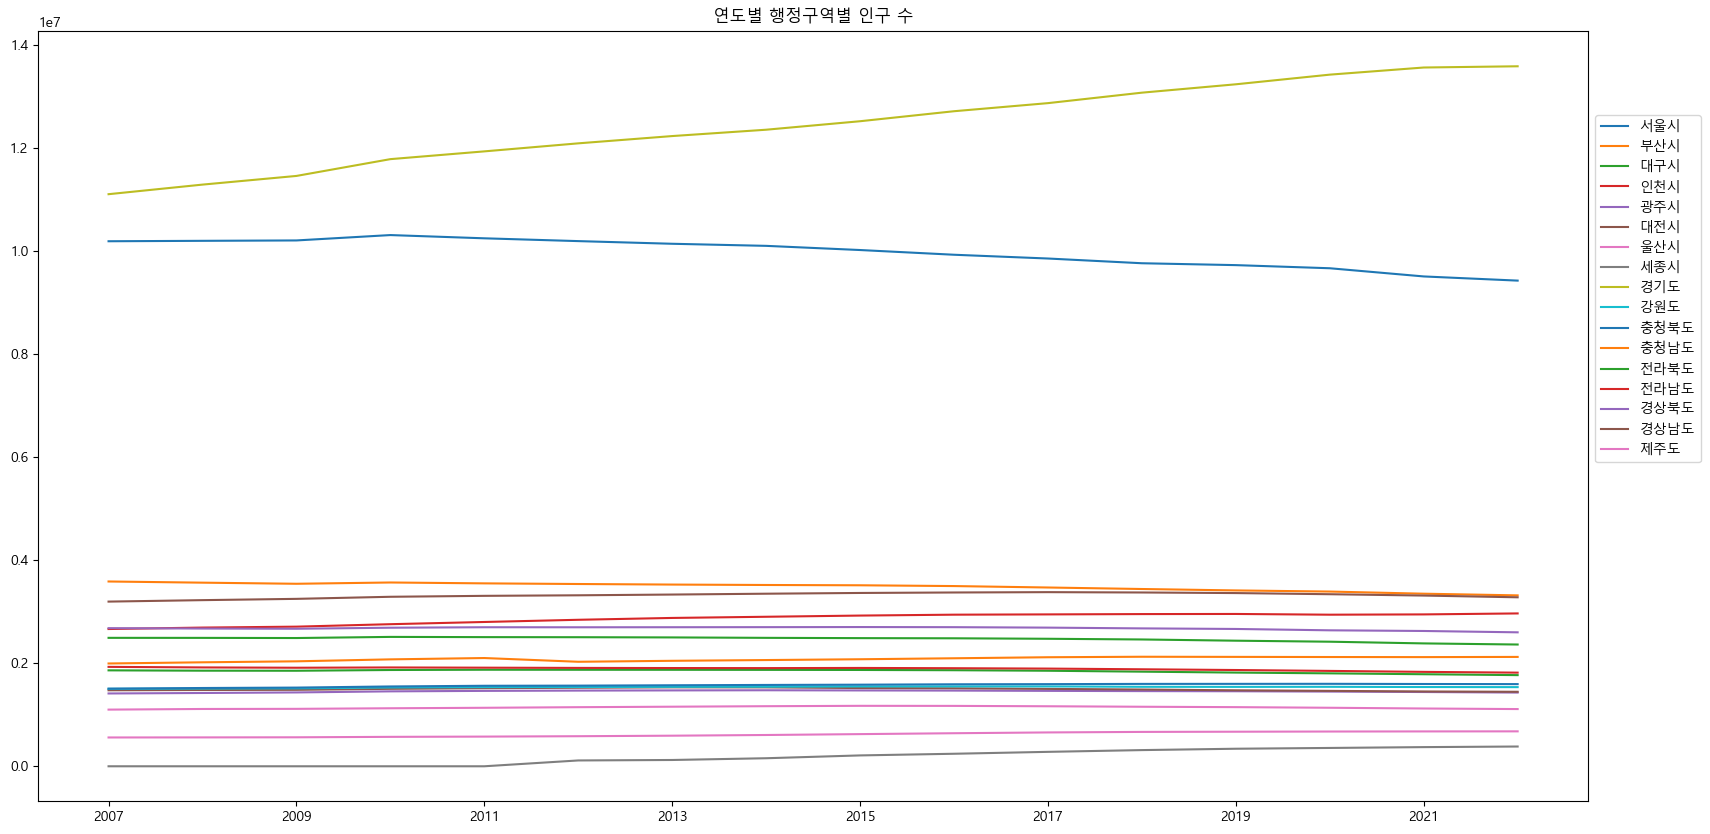

In [54]:
# 꺾은 선 그래프 그리기
locpeople_df.plot(figsize=(20, 10))
plt.legend(loc='upper left', bbox_to_anchor = (1, 0.9))
plt.title('연도별 행정구역별 인구 수')
plt.show()

In [55]:
# 연도별 인구 수 추출
locpeople_year = []
for i in range(15) :
    locpeople_year.append(locpeople_df.iloc[i:i+1])
 

In [56]:
locpeople_year

[           서울시      부산시      대구시      인천시      광주시      대전시      울산시  세종시   
 2007  10192710  3587439  2493261  2664576  1413444  1475659  1099995    0  \
 
            경기도      강원도     충청북도     충청남도     전라북도     전라남도     경상북도     경상남도   
 2007  11106211  1503806  1506608  1995531  1862277  1929836  2681364  3196953  \
 
          제주도  
 2007  559258  ,
            서울시      부산시      대구시      인천시      광주시      대전시      울산시  세종시   
 2008  10200827  3564577  2492724  2692696  1422702  1480895  1112407    0  \
 
            경기도      강원도     충청북도     충청남도     전라북도     전라남도     경상북도     경상남도   
 2008  11292264  1508575  1519587  2018537  1855772  1919000  2673931  3225255  \
 
          제주도  
 2008  560618  ,
            서울시      부산시      대구시      인천시      광주시      대전시      울산시  세종시   
 2009  10208302  3543030  2489781  2710579  1433640  1484180  1114866    0  \
 
            경기도      강원도     충청북도     충청남도     전라북도     전라남도     경상북도     경상남도   
 2009  11460610  1512870  1527478  2037582  18

In [57]:
locpeople_year[13]

,서울시,부산시,대구시,인천시,광주시,대전시,울산시,세종시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주도
2020,9668465,3391946,2418346,2942828,1450062,1463882,1136017,355831,13427014,1542840,1600837,2121029,1804104,1851549,2639422,3340216,674635


In [58]:
# 대한민국 지도 데이터 불러오기
jsonfile = open('sprint2_base/TL_SCCO_CTPRVN.json', 'r', 
                encoding='utf8').read()
jsondata = json.loads(jsonfile)

In [59]:
### 지도맵 그리기
people_map_2020 = folium.Map(
    ### 최초에 보여줄 지도위치(위/경도) 지정
    # - 최초에 중심점을 기준으로 지도가 그려짐
    location = [37.573050, 126.979189],

    ### 지도 스타일 지정하기
    # - 도시형 건물, 산림, 하천/도로 등 스타일 지정
    # openstreetmap : 도시형 건물 스타일(가장 일반적으로 사용됨)
    tiles = "openstreetmap",

    ### 최초에 화면에 보여질 스케일(zoom) 지정하기
    zoom_start = 6.5
)

people_map_2020

In [60]:
folium.GeoJson(jsondata, name='시도').add_to(people_map_2020)
people_map_2020

In [61]:
locpeople_year[5].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 2012 to 2012
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   서울시     1 non-null      int32
 1   부산시     1 non-null      int32
 2   대구시     1 non-null      int32
 3   인천시     1 non-null      int32
 4   광주시     1 non-null      int32
 5   대전시     1 non-null      int32
 6   울산시     1 non-null      int32
 7   세종시     1 non-null      int32
 8   경기도     1 non-null      int32
 9   강원도     1 non-null      int32
 10  충청북도    1 non-null      int32
 11  충청남도    1 non-null      int32
 12  전라북도    1 non-null      int32
 13  전라남도    1 non-null      int32
 14  경상북도    1 non-null      int32
 15  경상남도    1 non-null      int32
 16  제주도     1 non-null      int32
dtypes: int32(17)
memory usage: 76.0+ bytes


In [62]:
locpeople_year[13]

,서울시,부산시,대구시,인천시,광주시,대전시,울산시,세종시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주도
2020,9668465,3391946,2418346,2942828,1450062,1463882,1136017,355831,13427014,1542840,1600837,2121029,1804104,1851549,2639422,3340216,674635


In [63]:
locpeople_2020_df = locpeople_year[13].T

In [64]:
locpeople_2020_df

,2020
서울시,9668465
부산시,3391946
대구시,2418346
인천시,2942828
광주시,1450062
대전시,1463882
울산시,1136017
세종시,355831
경기도,13427014
강원도,1542840


In [65]:
locpeople_2020_df.columns

Index(['2020'], dtype='object')

In [66]:
locpeople_2020_df.rename(columns={'2020':'인구 수'}, inplace=True)

In [67]:
locpeople_2020_df

,인구 수
서울시,9668465
부산시,3391946
대구시,2418346
인천시,2942828
광주시,1450062
대전시,1463882
울산시,1136017
세종시,355831
경기도,13427014
강원도,1542840


In [68]:
locpeople_2020_df.index

Index(['서울시', '부산시', '대구시', '인천시', '광주시', '대전시', '울산시', '세종시', '경기도', '강원도',
       '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주도'],
      dtype='object')

In [69]:
locpeople_2020_df = locpeople_2020_df.reset_index()

In [70]:
locpeople_2020_df

,index,인구 수
0,서울시,9668465
1,부산시,3391946
2,대구시,2418346
3,인천시,2942828
4,광주시,1450062
5,대전시,1463882
6,울산시,1136017
7,세종시,355831
8,경기도,13427014
9,강원도,1542840


In [71]:
locpeople_2020_df = locpeople_2020_df.rename(columns={'index': '지역명'})

In [72]:
locpeople_2020_df

,지역명,인구 수
0,서울시,9668465
1,부산시,3391946
2,대구시,2418346
3,인천시,2942828
4,광주시,1450062
5,대전시,1463882
6,울산시,1136017
7,세종시,355831
8,경기도,13427014
9,강원도,1542840


In [73]:
# columns = ['서울시', '부산시', '대구시', '인천시', '광주시', '대전시', '울산시', '세종시', 
#            '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주도'], # DataFrame의 어떤 columns을 넣을지

In [74]:
folium.Choropleth(
    geo_data = jsondata, # 경계선 좌표값이 담긴 데이터
    data = locpeople_2020_df, # Series or DataFrame 넣으면 된다
    columns = ['지역명','인구 수' ], # DataFrame의 어떤 columns을 넣을지
    key_on = 'feature.properties.CTP_KOR_NM', # id 값을 가져오겠다; feature.id : feature 붙여줘야 함 (folium의 정해진 형식)
    fill_color = 'YlOrRd',
    fill_opacity = 0.5, # 색 투명도
    line_opacity = 0.5, # 선 투명도
    legend_name = '2020년 인구 수', # 범례
    highlight=True,
).add_to(people_map_2020)
people_map_2020

In [75]:
locpeople_2020_df

,지역명,인구 수
0,서울시,9668465
1,부산시,3391946
2,대구시,2418346
3,인천시,2942828
4,광주시,1450062
5,대전시,1463882
6,울산시,1136017
7,세종시,355831
8,경기도,13427014
9,강원도,1542840


In [76]:
# # 인구수 기준으로 내림차순으로 정리
# locpeople_2020_df = locpeople_2020_df.sort_values(by='인구 수')

In [77]:
# locpeople_2020_df

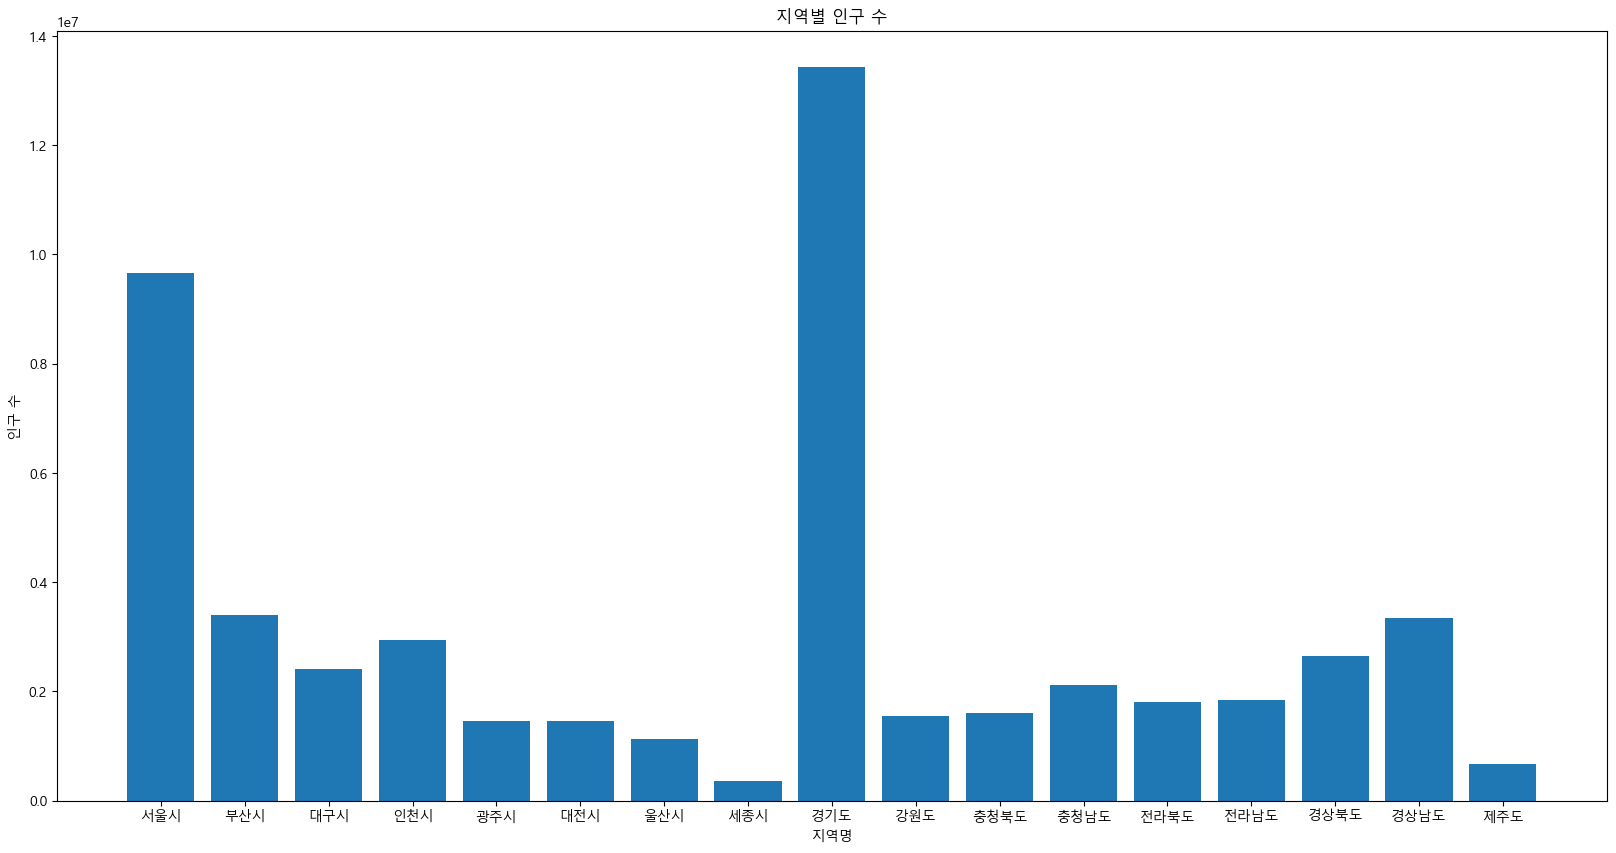

In [78]:
# 지역별 인구 수 내림차순으로 바그래프로 시각화

# 그래프 크기 조정
plt.figure(figsize=(20, 10))

# 데이터 준비
x = locpeople_2020_df['지역명']
y = locpeople_2020_df['인구 수']

# 바 그래프 그리기
plt.bar(x, y)

# 그래프 제목 설정
plt.title('지역별 인구 수')

# x축, y축 라벨 설정
plt.xlabel('지역명')
plt.ylabel('인구 수')



# 그래프 출력
plt.show()


In [79]:
# 인구와 전력소비량 데이터 간 상관관계 분석
corr_locelecpeop = locconelec_2020_df['전력소비량'].corr(locpeople_2020_df['인구 수'])
print(corr_locelecpeop)


0.8563198117518364


In [80]:
# 시각화를 위한 두 데이터 병합
data_2020_corr = pd.merge(locconelec_2020_df, locpeople_2020_df, on='지역명')

In [81]:
data_2020_corr

,지역명,전력소비량,인구 수
0,서울시,45787926,9668465
1,부산시,20503969,3391946
2,대구시,14758568,2418346
3,인천시,23638582,2942828
4,광주시,8531108,1450062
5,대전시,9405220,1463882
6,울산시,33157834,1136017
7,세종시,3393222,355831
8,경기도,124688963,13427014
9,강원도,16120066,1542840


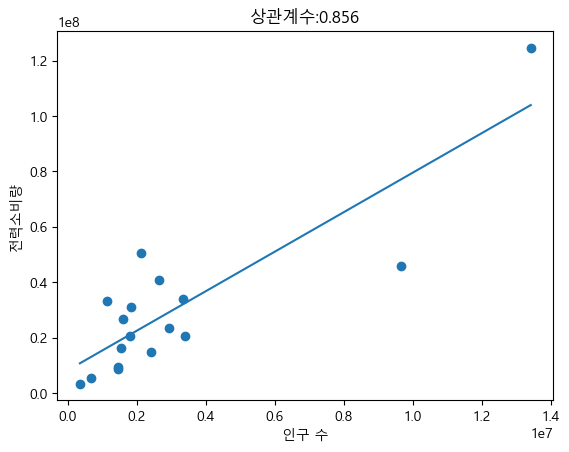

In [125]:
# 산점도와 회귀선 그리기
plt.scatter(data_2020_corr['인구 수'], data_2020_corr['전력소비량'])
plt.plot(np.unique(data_2020_corr['인구 수']), np.poly1d(np.polyfit(data_2020_corr['인구 수'], data_2020_corr['전력소비량'], 1))(np.unique(data_2020_corr['인구 수'])))
plt.title(f'상관계수:{corr_locelecpeop:.3f}')
plt.xlabel('인구 수')
plt.ylabel('전력소비량')
plt.show()

In [83]:
data_2020_corr['전력소비량/인구 수']  = data_2020_corr['전력소비량'] / data_2020_corr['인구 수']

In [84]:
data_2020_corr

,지역명,전력소비량,인구 수,전력소비량/인구 수
0,서울시,45787926,9668465,4.735801
1,부산시,20503969,3391946,6.044898
2,대구시,14758568,2418346,6.102753
3,인천시,23638582,2942828,8.032607
4,광주시,8531108,1450062,5.883271
5,대전시,9405220,1463882,6.424848
6,울산시,33157834,1136017,29.187797
7,세종시,3393222,355831,9.536049
8,경기도,124688963,13427014,9.286425
9,강원도,16120066,1542840,10.448307


In [85]:
# 인구수 기준으로 내림차순으로 정리
data_2020_corr_desc = data_2020_corr.sort_values(by='전력소비량/인구 수')

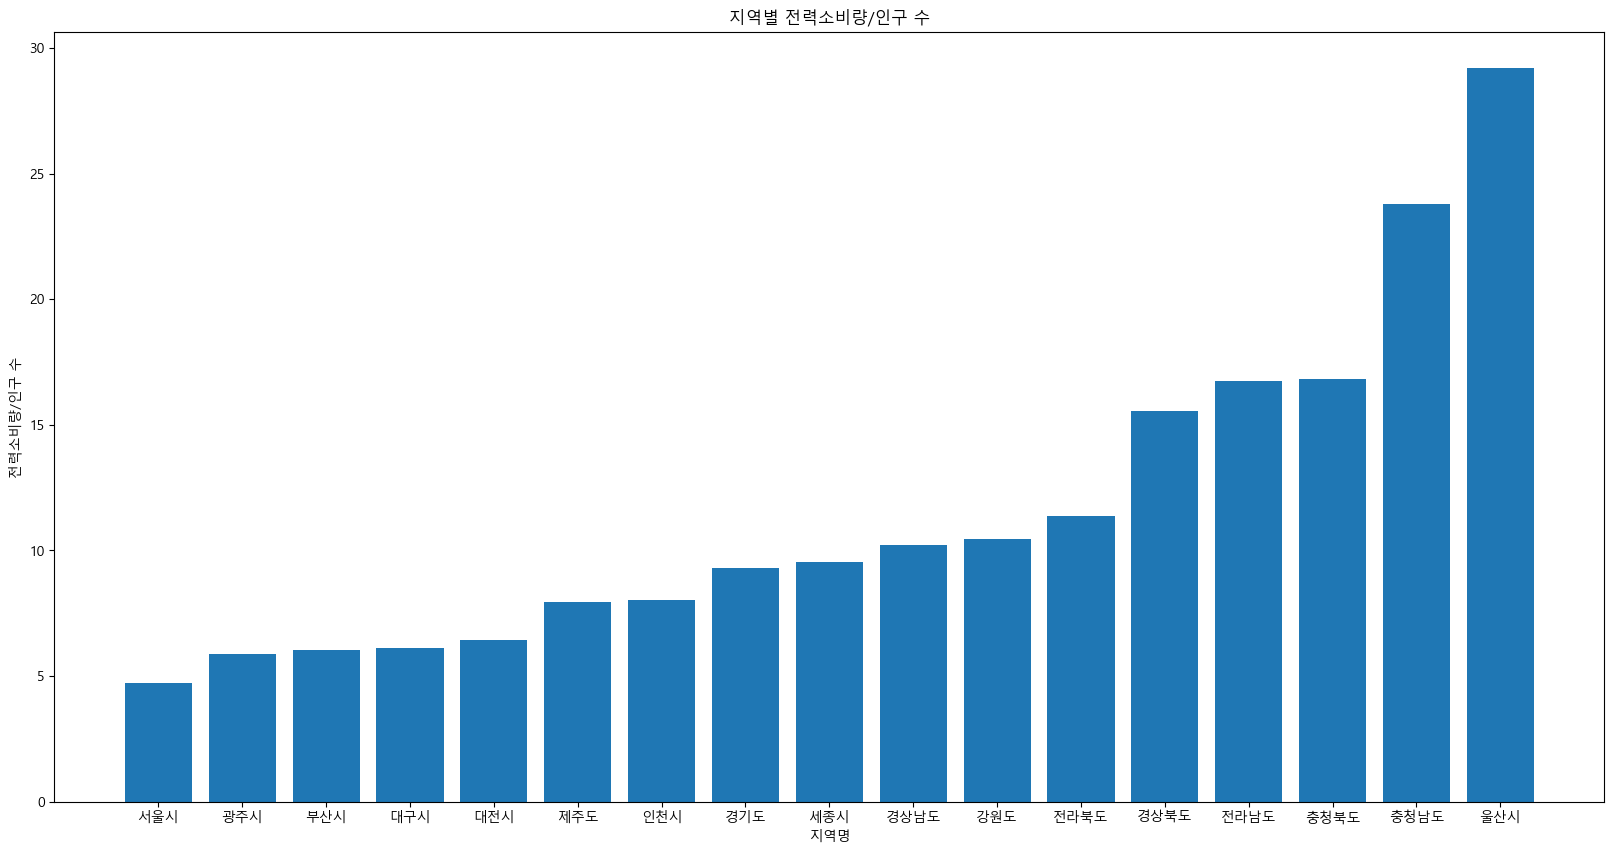

In [86]:
# 전력소비량/인구 수 내림차순으로 바그래프로 시각화

# 그래프 크기 조정
plt.figure(figsize=(20, 10))

# 데이터 준비
x = data_2020_corr_desc['지역명']
y = data_2020_corr_desc['전력소비량/인구 수']

# 바 그래프 그리기
plt.bar(x, y)

# 그래프 제목 설정
plt.title('지역별 전력소비량/인구 수')

# x축, y축 라벨 설정
plt.xlabel('지역명')
plt.ylabel('전력소비량/인구 수')



# 그래프 출력
plt.show()

In [87]:
# 제조업 종사자 수 인구 데이터 불러오기
# 엑셀 파일 경로 설정
csv_file_emplo = 'sprint2_base/제조업_종사자수.csv'

# 엑셀 파일에서 시트를 불러오기
elecemplo_df = pd.read_csv(csv_file_emplo, encoding='cp949')

# 불러온 데이터 출력
print(elecemplo_df)

    Unnamed: 0 행정구역별     종사자수
0          216    서울   245843
1          403    부산   202308
2          580    대구   161744
3          748    인천   237632
4          921    광주    83574
5         1086    대전    63342
6         1256    울산   170010
7         1419    세종    19640
8         1574    경기  1282263
9         1762    강원    60644
10        1930    충북   213467
11        2097    충남   301104
12        2264    전북   114855
13        2430    전남   118887
14        2593    경북   304086
15        2760    경남   393514
16        2930    제주    11992


In [88]:
elecemplo_df.drop(columns = ['Unnamed: 0'], inplace = True)

In [89]:
elecemplo_df

,행정구역별,종사자수
0,서울,245843
1,부산,202308
2,대구,161744
3,인천,237632
4,광주,83574
5,대전,63342
6,울산,170010
7,세종,19640
8,경기,1282263
9,강원,60644


In [90]:
elecemplo_df.rename(columns={'행정구역별':'지역명'}, inplace=True)

In [91]:
elecemplo_df

,지역명,종사자수
0,서울,245843
1,부산,202308
2,대구,161744
3,인천,237632
4,광주,83574
5,대전,63342
6,울산,170010
7,세종,19640
8,경기,1282263
9,강원,60644


In [92]:
data_2020_corr['전력소비량/종사자 수']  = data_2020_corr['전력소비량'] / elecemplo_df['종사자수']

In [93]:
data_2020_corr

,지역명,전력소비량,인구 수,전력소비량/인구 수,전력소비량/종사자 수
0,서울시,45787926,9668465,4.735801,186.248646
1,부산시,20503969,3391946,6.044898,101.350263
2,대구시,14758568,2418346,6.102753,91.246464
3,인천시,23638582,2942828,8.032607,99.475584
4,광주시,8531108,1450062,5.883271,102.078493
5,대전시,9405220,1463882,6.424848,148.483155
6,울산시,33157834,1136017,29.187797,195.034610
7,세종시,3393222,355831,9.536049,172.770978
8,경기도,124688963,13427014,9.286425,97.241333
9,강원도,16120066,1542840,10.448307,265.814689


In [94]:
# 인구수 기준으로 오름차순으로 정리
data_2020_corr_desc2 = data_2020_corr.sort_values(by='전력소비량/종사자 수')

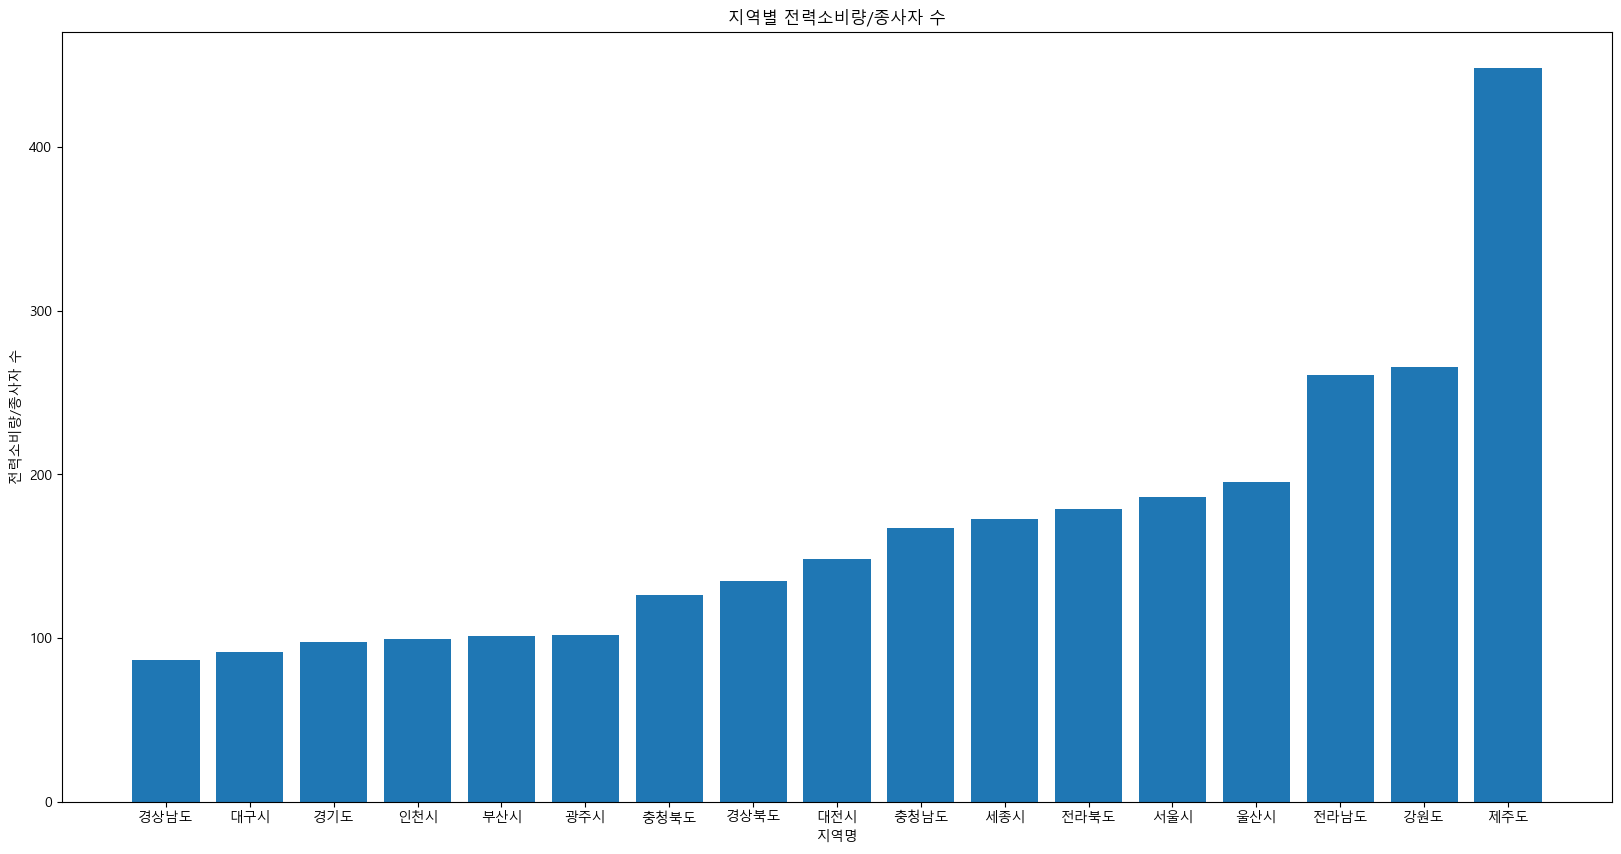

In [95]:
# 전력소비량/인구 수 내림차순으로 바그래프로 시각화

# 그래프 크기 조정
plt.figure(figsize=(20, 10))

# 데이터 준비
x = data_2020_corr_desc2['지역명']
y = data_2020_corr_desc2['전력소비량/종사자 수']

# 바 그래프 그리기
plt.bar(x, y)

# 그래프 제목 설정
plt.title('지역별 전력소비량/종사자 수')

# x축, y축 라벨 설정
plt.xlabel('지역명')
plt.ylabel('전력소비량/종사자 수')



# 그래프 출력
plt.show()

In [96]:
data_2020_corr['종사자 수/인구 수']  = elecemplo_df['종사자수'] / data_2020_corr['인구 수']

In [97]:
data_2020_corr

,지역명,전력소비량,인구 수,전력소비량/인구 수,전력소비량/종사자 수,종사자 수/인구 수
0,서울시,45787926,9668465,4.735801,186.248646,0.025427
1,부산시,20503969,3391946,6.044898,101.350263,0.059644
2,대구시,14758568,2418346,6.102753,91.246464,0.066882
3,인천시,23638582,2942828,8.032607,99.475584,0.080750
4,광주시,8531108,1450062,5.883271,102.078493,0.057635
5,대전시,9405220,1463882,6.424848,148.483155,0.043270
6,울산시,33157834,1136017,29.187797,195.034610,0.149654
7,세종시,3393222,355831,9.536049,172.770978,0.055195
8,경기도,124688963,13427014,9.286425,97.241333,0.095499
9,강원도,16120066,1542840,10.448307,265.814689,0.039307


In [101]:
data_2020_corr

,지역명,전력소비량,인구 수,전력소비량/인구 수,전력소비량/종사자 수,종사자 수/인구 수
0,서울시,45787926,9668465,4.735801,186.248646,0.025427
1,부산시,20503969,3391946,6.044898,101.350263,0.059644
2,대구시,14758568,2418346,6.102753,91.246464,0.066882
3,인천시,23638582,2942828,8.032607,99.475584,0.080750
4,광주시,8531108,1450062,5.883271,102.078493,0.057635
5,대전시,9405220,1463882,6.424848,148.483155,0.043270
6,울산시,33157834,1136017,29.187797,195.034610,0.149654
7,세종시,3393222,355831,9.536049,172.770978,0.055195
8,경기도,124688963,13427014,9.286425,97.241333,0.095499
9,강원도,16120066,1542840,10.448307,265.814689,0.039307


In [105]:
# 종사자 수/인구 수와 전력소비량 데이터 간 상관관계 분석
corr_locelecemplo = data_2020_corr['종사자 수/인구 수'].corr(data_2020_corr['전력소비량'])
print(corr_locelecemplo)

0.38216786086257837


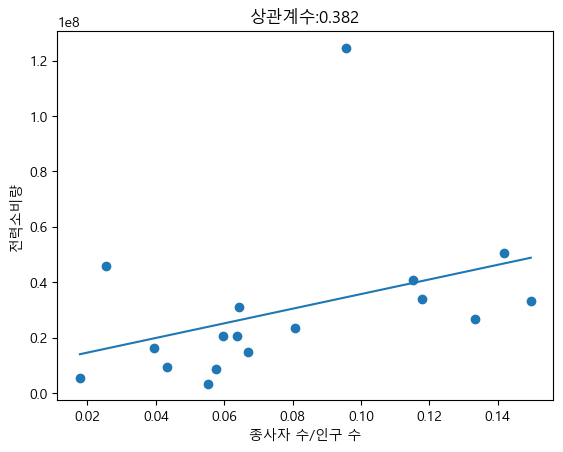

In [124]:
# 산점도와 회귀선 그리기
plt.scatter(data_2020_corr['종사자 수/인구 수'], data_2020_corr['전력소비량'])
plt.plot(np.unique(data_2020_corr['종사자 수/인구 수']), np.poly1d(np.polyfit(data_2020_corr['종사자 수/인구 수'], data_2020_corr['전력소비량'], 1))(np.unique(data_2020_corr['종사자 수/인구 수'])))
plt.title(f'상관계수:{corr_locelecemplo:.3f}')
plt.xlabel('종사자 수/인구 수')
plt.ylabel('전력소비량')
plt.show()

In [108]:
# 종사자 수/인구 수와 전력소비량/인구 수 데이터 간 상관관계 분석
corr_elecemplo = data_2020_corr['종사자 수/인구 수'].corr(data_2020_corr['전력소비량/인구 수'])
print(corr_elecemplo)

0.7789983489401978


In [113]:
float(corr_elecemplo)

0.7789983489401978

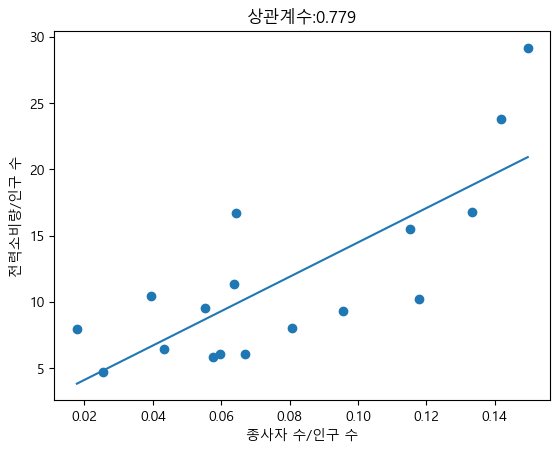

In [123]:
# 산점도와 회귀선 그리기
plt.scatter(data_2020_corr['종사자 수/인구 수'], data_2020_corr['전력소비량/인구 수'])
plt.plot(np.unique(data_2020_corr['종사자 수/인구 수']), np.poly1d(np.polyfit(data_2020_corr['종사자 수/인구 수'], data_2020_corr['전력소비량/인구 수'], 1))(np.unique(data_2020_corr['종사자 수/인구 수'])))
plt.xlabel('종사자 수/인구 수')
plt.title(f'상관계수:{corr_elecemplo:.3f}')
plt.ylabel('전력소비량/인구 수')
plt.show()